## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [4]:
## 確認硬體資源
"""
Your code here
"""
# 無顯卡
# !nvidia-smi

'\nYour code here\n'

In [5]:
import os
import keras

# Try to enable GPU (optional)
  # Disable GPU
  # os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [6]:
train, test = keras.datasets.cifar10.load_data()

In [7]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x,flatten=True):
    
    x = (x - x.min(axis=0)) / (x.max(axis=0) - x.min(axis=0)) * 2 - 1
       
    if flatten:
        x = x.reshape(len(x), -1)
    return x

    
def preproc_y(y,num_classes=10):
    
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [8]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [12]:
"""
Your code here
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128, 512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp(input_shape=x_train.shape[1:])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
hidden_layer4 (Dense)        (None, 512)               66048     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer6 (Dense)        (None, 128)               32896     
__________

In [13]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [14]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [15]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 10s 203us/step - loss: 1.6974 - acc: 0.3943 - val_loss: 1.5659 - val_acc: 0.4475
Epoch 2/100
50000/50000 [==============================] - 10s 194us/step - loss: 1.4643 - acc: 0.4826 - val_loss: 1.4482 - val_acc: 0.4875
Epoch 3/100
50000/50000 [==============================] - 10s 194us/step - loss: 1.3473 - acc: 0.5234 - val_loss: 1.4116 - val_acc: 0.5030
Epoch 4/100
50000/50000 [==============================] - 11s 212us/step - loss: 1.2554 - acc: 0.5550 - val_loss: 1.3929 - val_acc: 0.5117
Epoch 5/100
50000/50000 [==============================] - 10s 195us/step - loss: 1.1652 - acc: 0.5857 - val_loss: 1.3828 - val_acc: 0.5139
Epoch 6/100
50000/50000 [==============================] - 10s 198us/step - loss: 1.0941 - acc: 0.6127 - val_loss: 1.3485 - val_acc: 0.5260
Epoch 7/100
50000/50000 [==============================] - 10s

50000/50000 [==============================] - 12s 239us/step - loss: 0.1025 - acc: 0.9663 - val_loss: 3.4465 - val_acc: 0.5338
Epoch 57/100
50000/50000 [==============================] - 12s 238us/step - loss: 0.1035 - acc: 0.9657 - val_loss: 3.4134 - val_acc: 0.5321
Epoch 58/100
50000/50000 [==============================] - 12s 238us/step - loss: 0.1132 - acc: 0.9627 - val_loss: 3.2427 - val_acc: 0.5328
Epoch 59/100
50000/50000 [==============================] - 12s 237us/step - loss: 0.0977 - acc: 0.9671 - val_loss: 3.4170 - val_acc: 0.5249
Epoch 60/100
50000/50000 [==============================] - 12s 238us/step - loss: 0.1061 - acc: 0.9655 - val_loss: 3.3516 - val_acc: 0.5236
Epoch 61/100
50000/50000 [==============================] - 12s 236us/step - loss: 0.1107 - acc: 0.9632 - val_loss: 3.3929 - val_acc: 0.5329
Epoch 62/100
50000/50000 [==============================] - 12s 236us/step - loss: 0.0954 - acc: 0.9689 - val_loss: 3.3147 - val_acc: 0.5290
Epoch 63/100
50000/50000 [

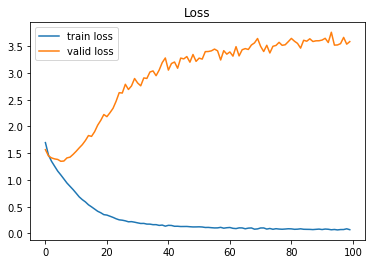

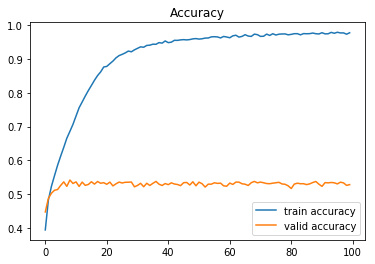

In [17]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()